# Twitter Sentiment Analysis

Sentiment analysis is a task of natural language processing (NLP).

I'm going to analyze sentiment in Twiter about Netflix. For that purpose I will scrape Twitter using snscrape

Let's start by importing the libraries we need

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
import nltk
import matplotlib.pyplot as plt

import snscrape.modules.twitter as sntwitter


Let's scrape Twitter getting last messages about Netflix

In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('netflix until:2022-04-24').get_items()):
    if i>10000:
        break
#    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    tweets_list2.append([tweet.date, tweet.content, tweet.likeCount, tweet.lang])
    
# Creating a dataframe from the tweets list above
#tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Text', 'Like Count', 'Language'])
tweets_df2.to_csv('First Extract.csv')
tweets_df2

,Datetime,Text,Like Count,Language
0,2022-04-23 23:59:57+00:00,Y yo buscando “secret” en #Netflix @abelprzl 🤣,1,es
1,2022-04-23 23:59:53+00:00,@netflix please this needs to be addressed on ...,3,en
2,2022-04-23 23:59:51+00:00,Havent decided. Why would I sell it when I can...,1,en
3,2022-04-23 23:59:48+00:00,@fabiolaken13 @NetflixBrasil https://t.co/pJ9E...,4,und
4,2022-04-23 23:59:45+00:00,hoje só quero saber da minha cama e netflix,0,pt
...,...,...,...,...
9996,2022-04-23 21:18:54+00:00,Dont really care about all this Netflix talk. ...,9,en
9997,2022-04-23 21:18:54+00:00,Blockbuster to Netflix right now https://t.co/...,18,en
9998,2022-04-23 21:18:53+00:00,Netflix que tal vc lançar Goblin no catálogo? ...,0,pt
9999,2022-04-23 21:18:53+00:00,@Batboat77 @__premkumar__ @steusmotus Lmao. Ne...,3,en


Let's select the messages written in english

In [3]:
tweets_df2 = tweets_df2[tweets_df2['Language']=='en']
tweets_df2

,Datetime,Text,Like Count,Language
1,2022-04-23 23:59:53+00:00,@netflix please this needs to be addressed on ...,3,en
2,2022-04-23 23:59:51+00:00,Havent decided. Why would I sell it when I can...,1,en
5,2022-04-23 23:59:44+00:00,@hopebble HEARTSTOPPER ON NETFLIX YOU SHOULD W...,0,en
6,2022-04-23 23:59:43+00:00,"Netflix, are you rapidly trying to torch any g...",326,en
7,2022-04-23 23:59:43+00:00,Does @netflix really think anyone would watch ...,3,en
...,...,...,...,...
9995,2022-04-23 21:18:55+00:00,@adeleherox @iamigcio @netflix i feel bad agre...,1,en
9996,2022-04-23 21:18:54+00:00,Dont really care about all this Netflix talk. ...,9,en
9997,2022-04-23 21:18:54+00:00,Blockbuster to Netflix right now https://t.co/...,18,en
9999,2022-04-23 21:18:53+00:00,@Batboat77 @__premkumar__ @steusmotus Lmao. Ne...,3,en


We have to clean up a lot of errors and other special symbols because these tweets contain a lot of language errors

In [4]:

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
tweets_df2["Text"] = tweets_df2["Text"].apply(clean)
tweets_df2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ecermc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ecermc\AppData\Local\Temp/ipykernel_11024/352844406.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df2["Text"] = tweets_df2["Text"].apply(clean)


,Datetime,Text,Like Count,Language
1,2022-04-23 23:59:53+00:00,netflix pleas need address sell sunset reunion,3,en
2,2022-04-23 23:59:51+00:00,havent decid would sell debutampcharg websit c...,1,en
5,2022-04-23 23:59:44+00:00,hopebbl heartstopp netflix watch idk,0,en
6,2022-04-23 23:59:43+00:00,netflix rapid tri torch goodwillwho make decis...,326,en
7,2022-04-23 23:59:43+00:00,netflix realli think anyon would watch selling...,3,en
...,...,...,...,...
9995,2022-04-23 21:18:55+00:00,adeleherox iamigcio netflix feel bad agre rele...,1,en
9996,2022-04-23 21:18:54+00:00,dont realli care netflix talk person dont real...,9,en
9997,2022-04-23 21:18:54+00:00,blockbust netflix right,18,en
9999,2022-04-23 21:18:53+00:00,premkumar steusmotus lmao netflix didnt lose ...,3,en


Let's visualize the word cloud for these tweets

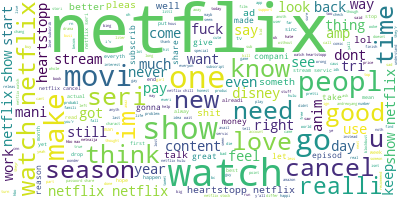

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(tweets_df2['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Let's use nltk to calculate the sentiment scores of these tweets and assign a label to the tweets as positive, negative, or neutral

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
tweets_df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_df2['Text']]
tweets_df2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_df2['Text']]
tweets_df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets_df2['Text']]
tweets_df2 = tweets_df2.drop(tweets_df2[tweets_df2.Neutral == 1.0].index)
tweets_df2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ecermc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ecermc\AppData\Local\Temp/ipykernel_11024/2580992101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_df2['Text']]
C:\Users\ecermc\AppData\Local\Temp/ipykernel_11024/2580992101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df2["Negative"] 

,Datetime,Text,Like Count,Language,Positive,Negative,Neutral
2,2022-04-23 23:59:51+00:00,havent decid would sell debutampcharg websit c...,1,en,0.155,0.000,0.845
5,2022-04-23 23:59:44+00:00,hopebbl heartstopp netflix watch idk,0,en,0.000,0.259,0.741
12,2022-04-23 23:59:39+00:00,never known joy like watch nice littl gay netf...,57,en,0.195,0.180,0.625
14,2022-04-23 23:59:36+00:00,les recomiendo seri de netflix ya para que dej...,4,en,0.081,0.000,0.919
15,2022-04-23 23:59:33+00:00,tltomljanov nycmidnight usual watch episod two...,0,en,0.200,0.000,0.800
...,...,...,...,...,...,...,...
9991,2022-04-23 21:18:58+00:00,read heartstopp webtoon rn better netflix seri...,3,en,0.266,0.000,0.734
9993,2022-04-23 21:18:56+00:00,sicken netflix bin class show issu know teas ...,2,en,0.092,0.204,0.704
9995,2022-04-23 21:18:55+00:00,adeleherox iamigcio netflix feel bad agre rele...,1,en,0.000,0.333,0.667
9996,2022-04-23 21:18:54+00:00,dont realli care netflix talk person dont real...,9,en,0.139,0.122,0.740


In [13]:
def label_sentiment (row):
    if (row['Positive'] > row['Neutral']):
        if (row['Positive'] > row['Negative']):
            return 'Positive'
        else:
            return 'Negative'
    else:
        if (row['Negative'] > row['Neutral']):
            return 'Negative'
        else:
            return 'Neutral'
tweets_df2['sentiment'] = tweets_df2.apply (lambda row: label_sentiment(row), axis=1)

tweets_df2

,Datetime,Text,Like Count,Language,Positive,Negative,Neutral,sentiment
2,2022-04-23 23:59:51+00:00,havent decid would sell debutampcharg websit c...,1,en,0.155,0.000,0.845,Neutral
5,2022-04-23 23:59:44+00:00,hopebbl heartstopp netflix watch idk,0,en,0.000,0.259,0.741,Neutral
12,2022-04-23 23:59:39+00:00,never known joy like watch nice littl gay netf...,57,en,0.195,0.180,0.625,Neutral
14,2022-04-23 23:59:36+00:00,les recomiendo seri de netflix ya para que dej...,4,en,0.081,0.000,0.919,Neutral
15,2022-04-23 23:59:33+00:00,tltomljanov nycmidnight usual watch episod two...,0,en,0.200,0.000,0.800,Neutral
...,...,...,...,...,...,...,...,...
9991,2022-04-23 21:18:58+00:00,read heartstopp webtoon rn better netflix seri...,3,en,0.266,0.000,0.734,Neutral
9993,2022-04-23 21:18:56+00:00,sicken netflix bin class show issu know teas ...,2,en,0.092,0.204,0.704,Neutral
9995,2022-04-23 21:18:55+00:00,adeleherox iamigcio netflix feel bad agre rele...,1,en,0.000,0.333,0.667,Neutral
9996,2022-04-23 21:18:54+00:00,dont realli care netflix talk person dont real...,9,en,0.139,0.122,0.740,Neutral


In [14]:
tweets_df2.groupby(by="sentiment").mean()

,Like Count,Positive,Negative,Neutral
sentiment,,,,
Negative,3.497143,0.052737,0.581749,0.365531
Neutral,16.209390,0.179201,0.131760,0.689037
Positive,4.277108,0.546572,0.061639,0.391765


In [15]:
temp = tweets_df2.groupby('sentiment').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,Text
1,Neutral,2918
0,Negative,175
2,Positive,166


Let's visualize the number of the different sentiments

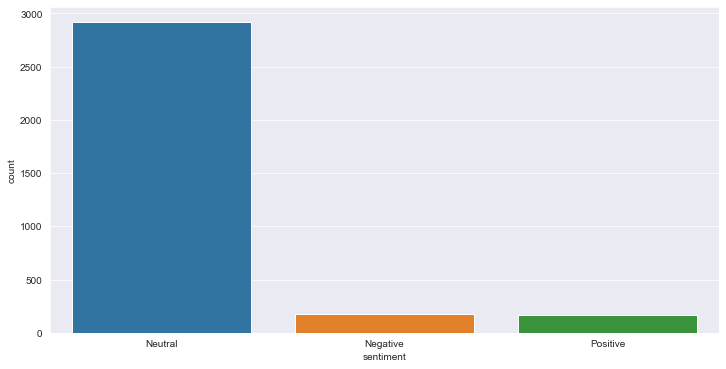

In [16]:
import seaborn as sns
sns.set_style('darkgrid')
plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=tweets_df2)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.Text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

The total of neutral is much higher than negative and positive. The number of negative tweets is very similar to the positive tweets.